# Listening Dropoff
**Author:** Jim Maddock  
**Last Updated:** 9-11-19  
**Dscription:** Check to see when participants paused a voice

In [33]:
if(!require(ggplot2)){install.packages("ggplot2")}

In [34]:
# load data from file
load("~/research_data/mozilla_voice_comparison/Rdata")
wpm = read.csv("~/research_data/mozilla_voice_comparison/voice_metadata.csv")

data = data[, -c(1:21, 24, 34, 37, 48, 55, 63)]
colnames(data) = c("MID", "audio.paused", "page.seconds", "rate.experience", "rate.speed", "rate.again",
                   "voice.easy", "voice.monotone", "voice.natural", "voice.no_emotion", "voice.focus",
                   "voice.all", "voice.none", "voice.other",
                   "check1", "check2", "check3", "check4", "check5", "check6", "check7", 
                   "age", "gender",
                   "race.asian", "race.hawaiian", "race.aa", "race.cc", "race.latin", "race.indian", "race.other",
                   "income", "state", "device", "device.other", "headphones", "voice")

data = as.data.frame(lapply(data, function (x) if (is.factor(x)) factor(x) else x))

data$check1 = ifelse(data$check1 == "An article about dealing with stress", 1, 0)
data$check2 = ifelse(data$check2 == "His constant need for success", 1, 0)
data$check3 = ifelse(data$check3 == "It oxygenates your brain", 1, 0)
data$check4 = ifelse(data$check4 == "2 and 3", 1, 0)
data$check5 = ifelse(data$check5 == "Ask yourself if a thought is really true.", 1, 0)
data$check6 = ifelse(data$check6 == "Everything has to have a purpose", 1, 0)
data$check7 = ifelse(data$check7 == "Do less than you want to do", 1, 0)
                            
data = merge(data, wpm, by.y="Voice", by.x="voice")
data$audio.paused.percent = data$audio.paused/data$Time..article.only.

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”

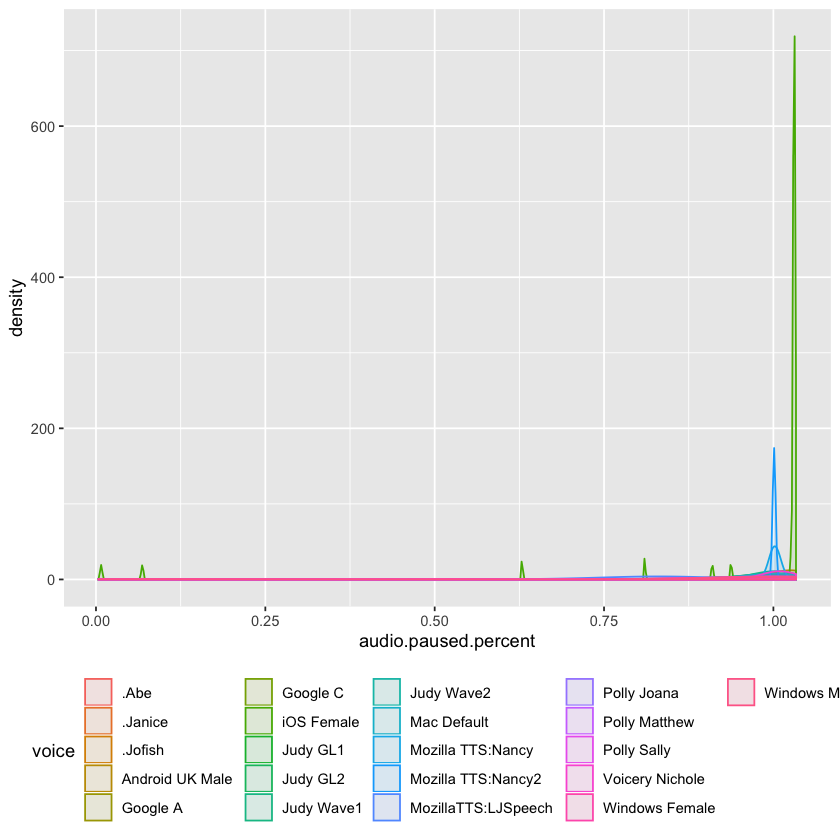

In [37]:
ggplot(data, aes(x = audio.paused.percent, color = voice, fill = voice)) +
  geom_density(alpha = 0.1) +
  theme(legend.position="bottom")

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”

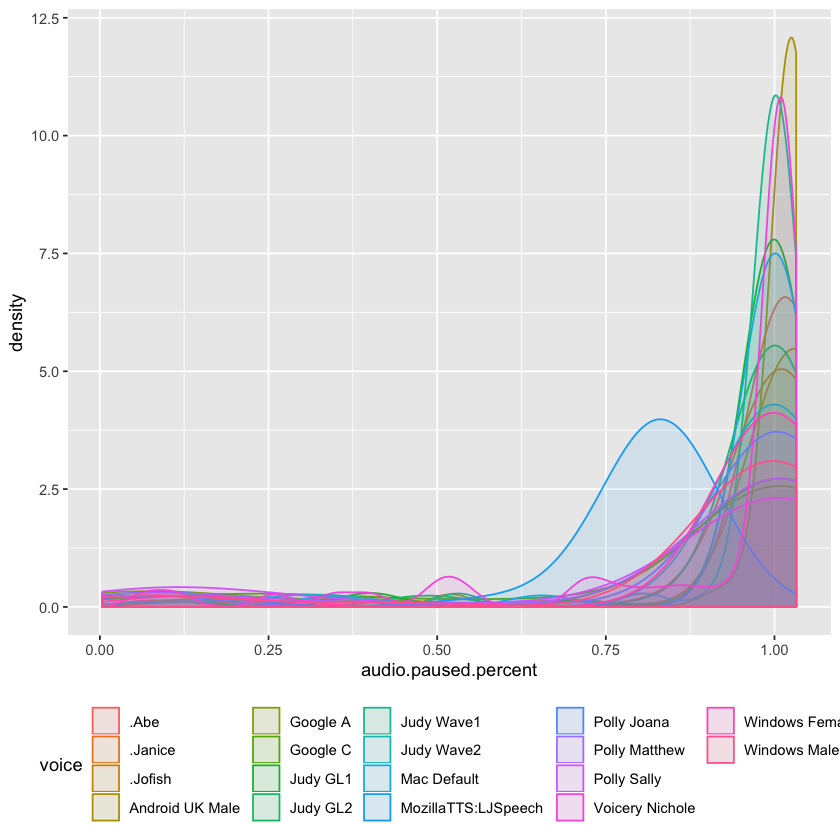

In [38]:
exclude = c('iOS Female', 'Mozilla TTS:Nancy2', 'Mozilla TTS:Nancy')
ggplot(subset(data, !(voice %in% exclude)), aes(x = audio.paused.percent, color = voice, fill = voice)) +
  geom_density(alpha = 0.1) +
  theme(legend.position="bottom")

In [42]:
summary(subset(data, voice == "iOS Female")$audio.paused.percent)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.007631 1.030333 1.031020 0.975372 1.031020 1.033361 

[1] 0.007630896